In [2]:
import pandas as pd
import numpy as np
import json


In [3]:
experiment = "experiment-traffic-lights"
with open(f'traffic/input_files/{experiment}/traffic.json', "r") as read_file:
    drivers_input_data = json.load(read_file)
with open(f'traffic/input_files/{experiment}/drivers.json', "r") as read_file:
    traffic_input_data = json.load(read_file)
with open(f'traffic/input_files/{experiment}/lights.json', "r") as read_file:
    lights_input_data = json.load(read_file)

In [4]:
experiment_results = pd.read_csv(f'traffic/output_files/{experiment}/measures_files.csv').drop(["Unnamed: 0"],axis=1)

experiment_results.head()

,n_agents,max_speed_avg,max_speed_dev,desired_distance_avg,desired_distance_dev,acceleration_avg,acceleration_dev,n_lanes,t_start,t_end,x_start,x_end,measure_point_x,accepted_dist_delta,window_size,average_velocity,rolling_average_density,rolling_average_flow
0,25,2,0.4,30,0,1.5,0.3,3,222,756,500,600,500,10,100,2.022152,0.023832,5.2


In [4]:
agent_data = pd.read_csv(f'traffic/output_files/{experiment}/agent_data.csv')
agent_data["Velocity"] = agent_data["Velocity"].apply(lambda x: float(x.split(" ")[0].replace("[","")))
agent_data["Velocity"] = agent_data["Velocity"].astype(float)
agent_data.head()

,Step,AgentID,X,Y,Velocity,Current_lane,Is_alive
0,1,0,0.651541,100.000000,0.651541,1,True
1,1,1,0.782705,33.333333,0.782705,0,True
2,1,2,0.000000,100.000000,1.017921,1,False
3,1,3,0.000000,33.333333,0.733379,0,False
4,1,4,0.000000,33.333333,0.929101,0,False


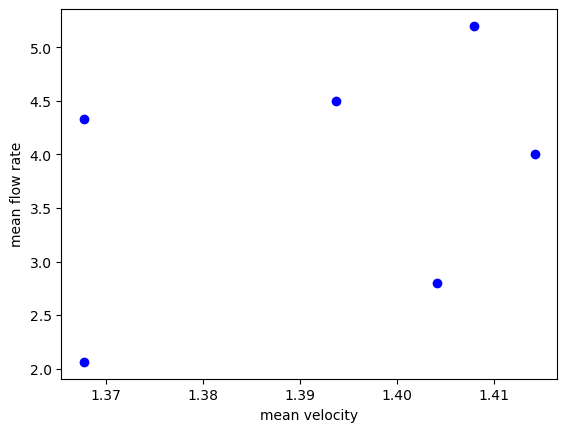

In [5]:
import matplotlib.pyplot as plt

# Create a new figure and axis
fig, ax = plt.subplots()

ax.scatter(experiment_results['average_velocity'], 
           experiment_results['rolling_average_flow'], 
           color='blue')

# Add labels and legend
ax.set_xlabel('mean velocity')
ax.set_ylabel('mean flow rate')
# ax.legend()

# Display the plot
plt.show()

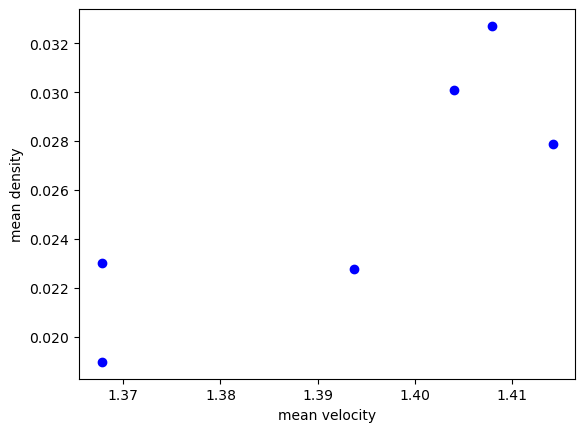

In [6]:
# Create a new figure and axis
fig, ax = plt.subplots()

ax.scatter(experiment_results['average_velocity'], 
           experiment_results['rolling_average_density'], 
           color='blue')

# Add labels and legend
ax.set_xlabel('mean velocity')
ax.set_ylabel('mean density')
# ax.legend()

# Display the plot
plt.show()

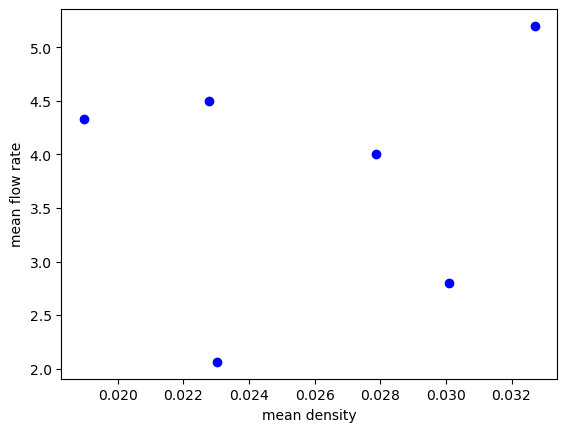

In [7]:
# Create a new figure and axis
fig, ax = plt.subplots()

ax.scatter(experiment_results['rolling_average_density'], 
           experiment_results['rolling_average_flow'], 
           color='blue')

# Add labels and legend
ax.set_xlabel('mean density')
ax.set_ylabel('mean flow rate')
# ax.legend()

# Display the plot
plt.show()